## **Imports**

In [1]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import  KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve , accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

In [2]:
train= pd.read_csv('/content/drive/MyDrive/maid.cc project/train - train.csv')
test=pd.read_csv('/content/drive/MyDrive/maid.cc project/test - test.csv')

In [3]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [4]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


The values are nearly the same -> from the same distribution

In [7]:
#number of null values in our train dataset
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
mask = train.isnull().any(axis=1)

# Filter the DataFrame to get the rows with missing values
rows_with_missing_values = train[mask]
rows_with_missing_values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


The presence of NaNs in just 9 rows seems negligible compared to the overall dataset. Also, filling multiple columns in the same row could potentially mislead the model. Hence, it's advisable to remove these rows entirely.

In [10]:
# Remove rows with missing values
train.dropna(inplace=True)

# Reset indices
train.reset_index(drop=True, inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_sc

In [12]:
train.nunique()

battery_power    1090
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1132
px_width         1107
ram              1556
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
train.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

Having pixel height or screen width equal to zero in mobile device specifications implies rendering the device non-functional or nonexistent. This may be due error in aquiring the data.

In [14]:
px_mask = train['px_height'] == 0
sc_mask = train['sc_w'] == 0
print(f'pixel height = 0  :  {sum(px_mask)}')
print(f'screen width = 0  :  {sum(sc_mask)}')

pixel height = 0  :  2
screen width = 0  :  178


In [15]:
train=train[train['sc_w']>=2]
train=train[train['px_height']>0]
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,858,0,2.2,0,1.0,0.0,50.0,0.1,84.0,1.0,...,528.0,1416.0,3978.0,17.0,16.0,3,1,1,0,3
1600,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1601,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1602,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


## **EDA**

<Axes: >

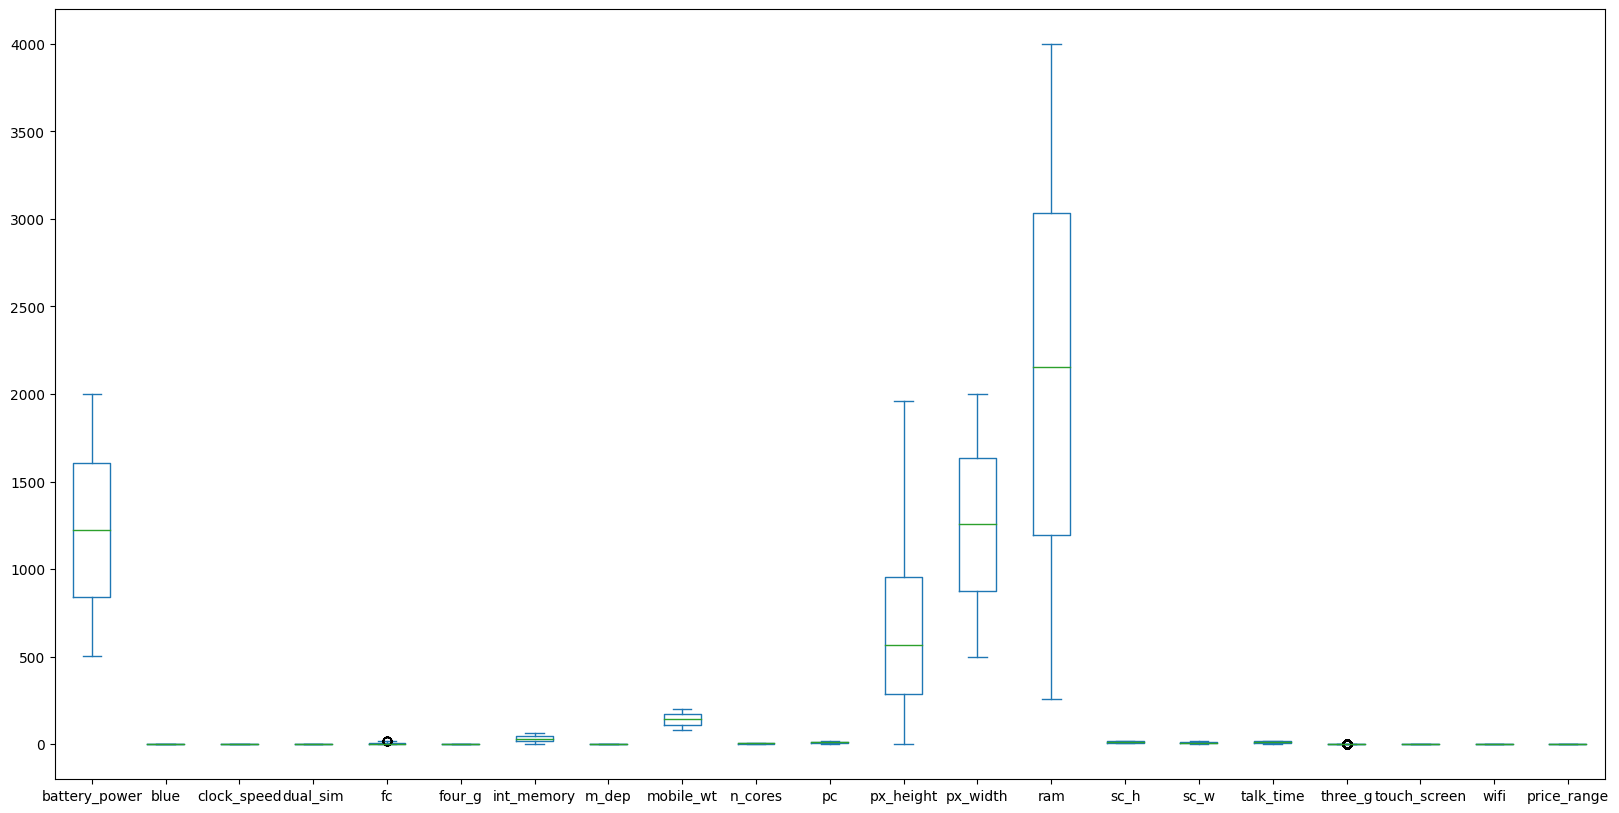

In [16]:
train.plot(kind='box',figsize=(20,10))

In [17]:
# split categorical and numerical features.
categorical_variables=[col for col in train.columns if train[col].nunique()<=8]
print('categorical:',categorical_variables)
continuous_variables=[col for col in train.columns if train[col].nunique()>8]
print('continuous:' ,continuous_variables)

categorical: ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
continuous: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [18]:
fig= px.histogram(data_frame = train, x = 'blue', color = 'price_range',
             title = 'The effect of having Bluetooth or not')
fig.update_layout({'bargap': 0.5})
fig.show()

The bluetooth has almost no direct affect on the price, almost equal number per each range

In [19]:
fig= px.histogram(data_frame = train, x = 'dual_sim', color = 'price_range',
             title = 'The effect of having having Dual Sim or not')
fig.update_layout({'bargap': 0.5})
fig.show()

In [20]:
fig= px.histogram(data_frame = train, x = 'four_g', color = 'price_range',
             title = 'The effect of having 4G or not')
fig.update_layout({'bargap': 0.5})
fig.show()

In [21]:
fig= px.histogram(data_frame = train, x = 'n_cores', color = 'price_range',
             title = 'The effect of different Cores')
fig.update_layout({'bargap': 0.5})
fig.show()

n_cores
5.0    208
4.0    207
7.0    207
8.0    205
3.0    201
1.0    200
2.0    190
6.0    186
Name: count, dtype: int64


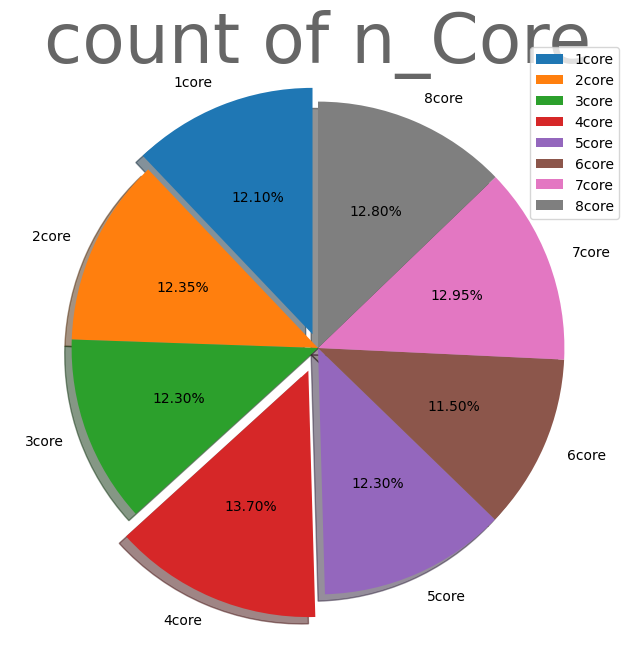

In [22]:
print(train['n_cores'].value_counts())
core_label = ['1core','2core','3core','4core','5core','6core','7core','8core']
core_size = [242,247,246,274,246,230,259,256]
core_explode = (0.06,0,0,0.1,0,0,0,0)

plt.figure(figsize=(10,8))
plt.pie( core_size , explode=core_explode , labels=core_label ,shadow=True , autopct='%1.2f%%' , startangle=90)
plt.title("count of n_Core",fontname='Impact',fontsize=50,y=.95,alpha=0.6)
plt.legend()
plt.show()

In [23]:
fig= px.histogram(data_frame = train, x = 'three_g', color = 'price_range',
             title = 'The effect of having 3G or not')
fig.update_layout({'bargap': 0.5})
fig.show()

The number of phones that are 3-g is almost 3X that of mobiles that are not 3-g


In [24]:
fig= px.histogram(data_frame = train, x = 'touch_screen', color = 'price_range',
             title = 'The effect of having touch screen or not')
fig.update_layout({'bargap': 0.5})
fig.show()

In [25]:
fig= px.histogram(data_frame = train, x = 'wifi', color = 'price_range',
             title = 'The effect of having wifi or not')
fig.update_layout({'bargap': 0.5})
fig.show()

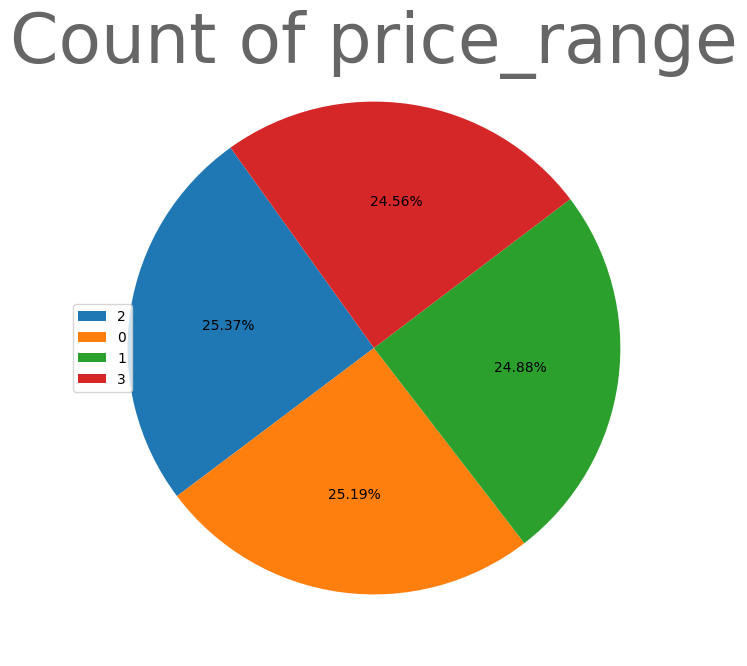

In [26]:
size =train.price_range.value_counts().values/10
lbl=train.price_range.value_counts().index
plt.figure(figsize=(10,8))
plt.title('Count of price_range',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
plt.pie(size ,startangle=125.6,autopct='%1.2f%%')
plt.legend(labels=lbl,loc='center left')
plt.show()

The data is balanced as we have almost equal examples for each price range

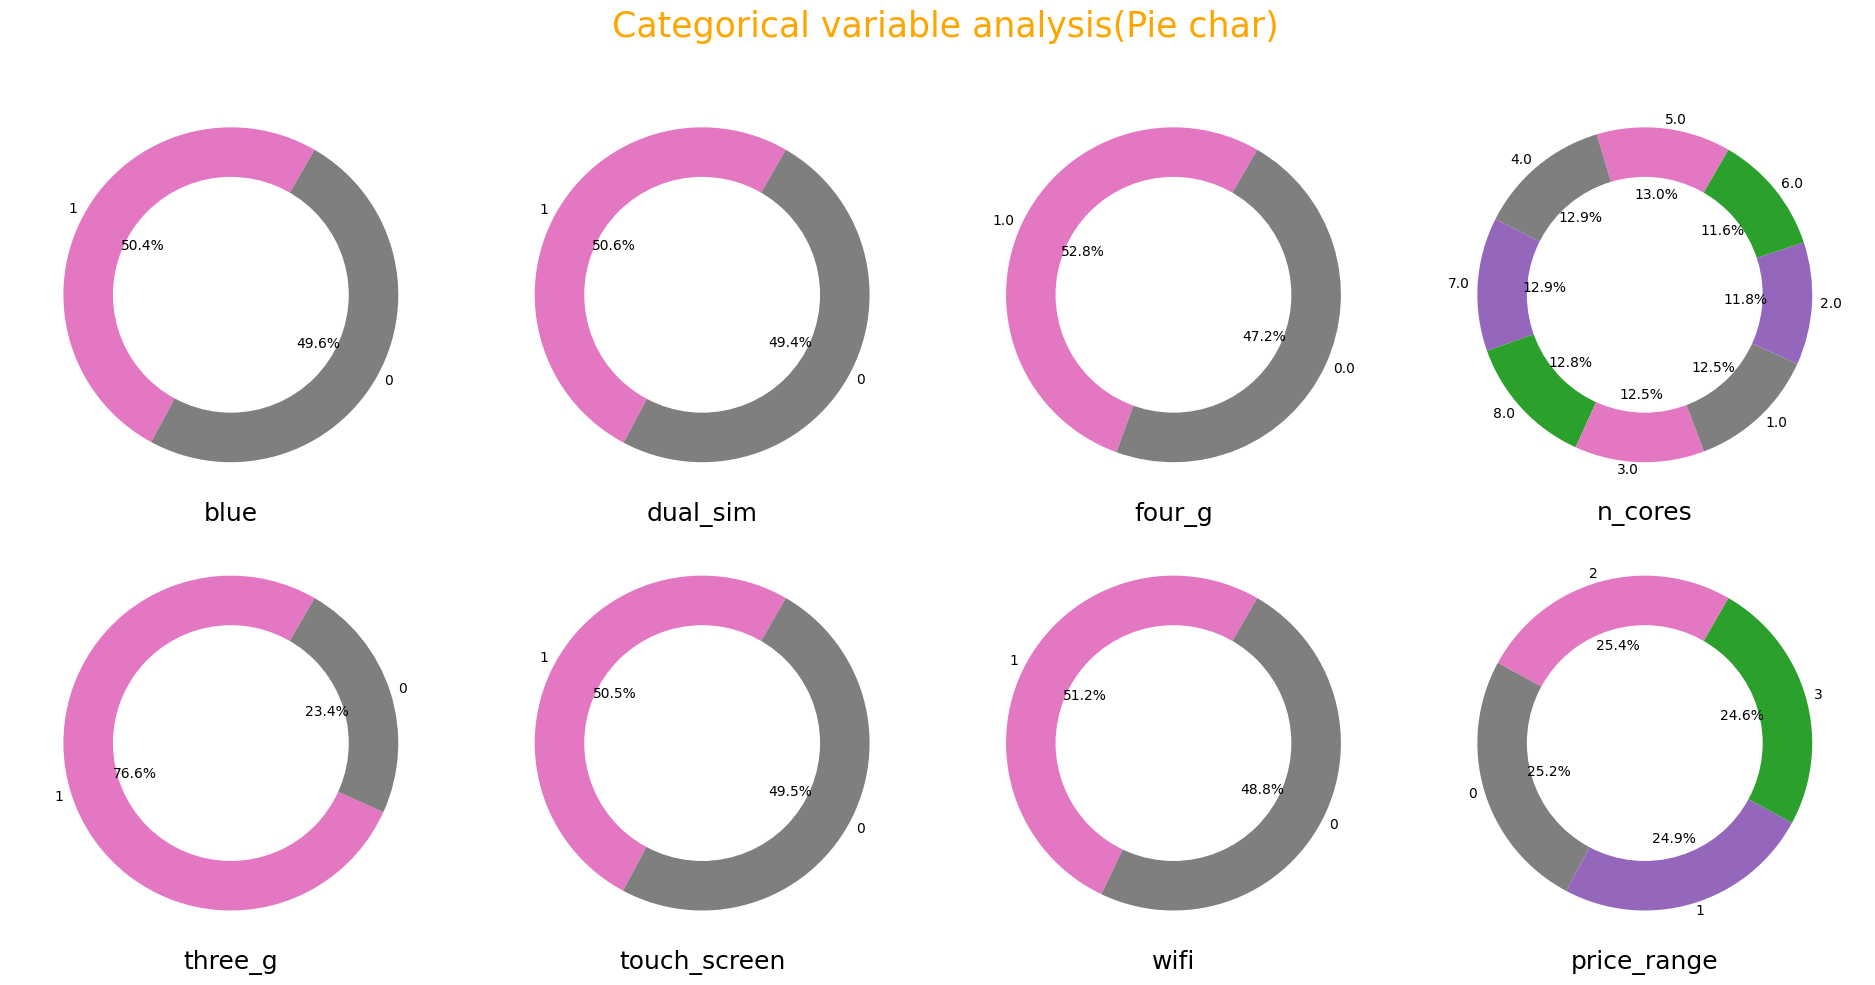

In [27]:
plt.figure(figsize = [19,10])
plt.suptitle('Categorical variable analysis(Pie char)\n', fontsize=25, c = 'orange')
colors = ['C6','C7', 'C4', 'C2']
i = 1
for col in categorical_variables:
        plt.subplot(2,4,i)
        my_circle = plt.Circle((0, 0), 0.7, color='white')
        sizes = train[col].value_counts()
        d = plt.pie(sizes, colors = colors, labels = train[col].value_counts().index, autopct='%1.1f%%',
            startangle=60, labeldistance=1.05)
        plt.axis('equal')
        plt.gca().add_artist(my_circle)

        plt.xlabel(col, size=18)

        i+=1

plt.tight_layout()
plt.show()

<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-6a985f50c45c>:5: FutureWarning:



The `ci` parameter is deprecated. Use

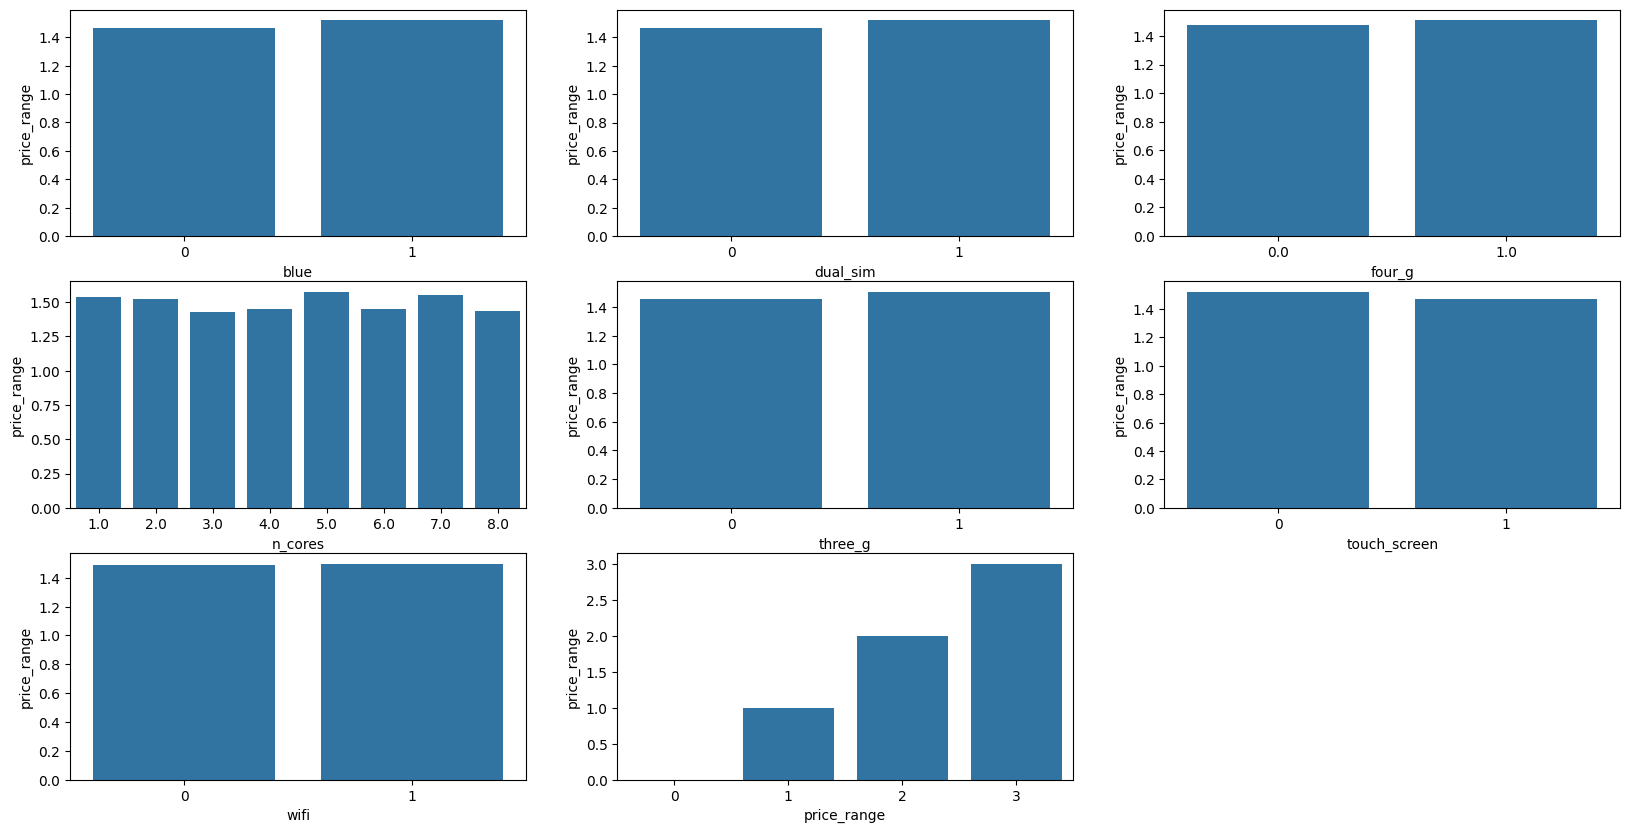

In [28]:
#categorical feature and target
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(3,3,i+1)
    sns.barplot(x=col,y='price_range',data=train,ci=None)

Observations:

* Bluetooth is typically present in more expensive mobile devices.
* The inclusion of a dual SIM card holder tends to raise the price of a mobile.
* Mobiles categorized as "very expensive" often offer 4G connectivity.
* Additionally, high-end mobiles usually provide 3G connectivity as well.

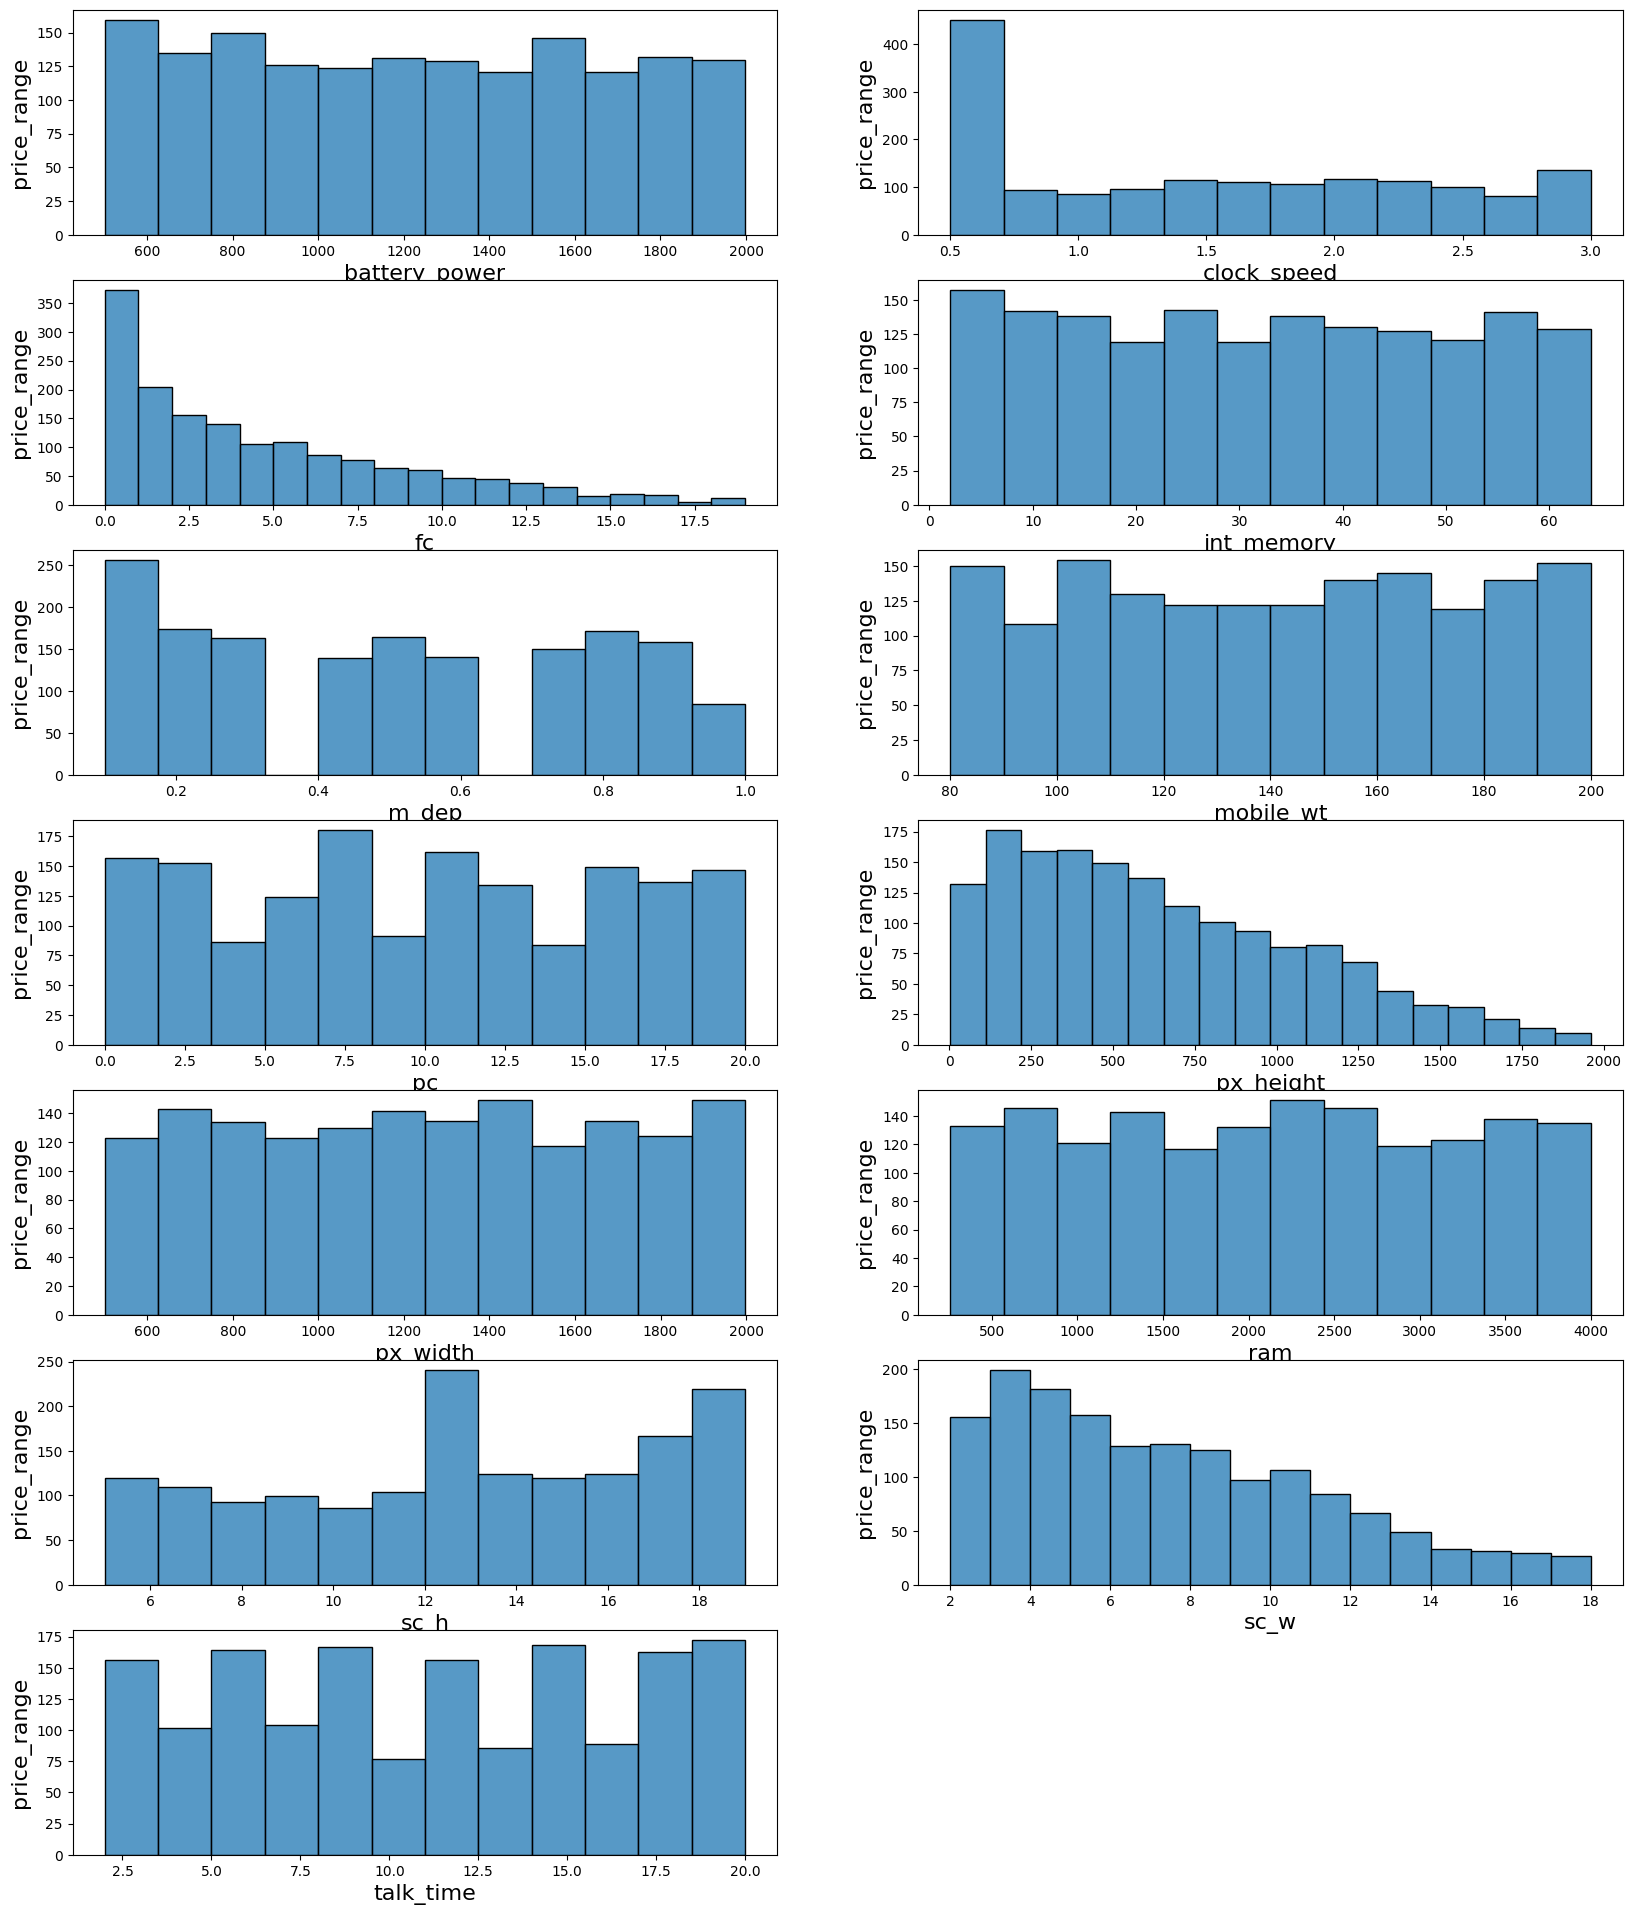

In [29]:
plt.figure(figsize=(20,45))

for i, col in enumerate(continuous_variables, start=1):
    plt.subplot(13,2,i)
    if 'scatter' in plt.gca().get_title():
        plt.scatter(train[col], train['price_range'])
    else:
        sns.histplot(train[col])
    plt.xlabel(col, fontsize=16)
    plt.ylabel('price_range', fontsize=16)


Observations:

* There exists a positive correlation between the size of RAM and the price of the mobile, indicating a relationship between RAM and price range.
Specifically, within different price classes:
* Class 0 (low cost) mobiles typically have RAM sizes ranging between 0 and 2000 megabytes.
* Class 1 (medium cost) mobiles exhibit RAM sizes varying between 0 and 3000 megabytes.
* Class 2 (high cost) mobiles usually feature RAM sizes ranging from 1000 to 4000 megabytes.
* Class 3 (very high cost) mobiles typically offer RAM sizes between 2000 and 4000 megabytes, with a prevalent range of 3500 to 4000 megabytes.

<ipython-input-30-7af9db7ab141>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-30-7af9db7ab141>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-30-7af9db7ab141>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-30-7af9db7ab141>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-30-7af9db7ab141>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

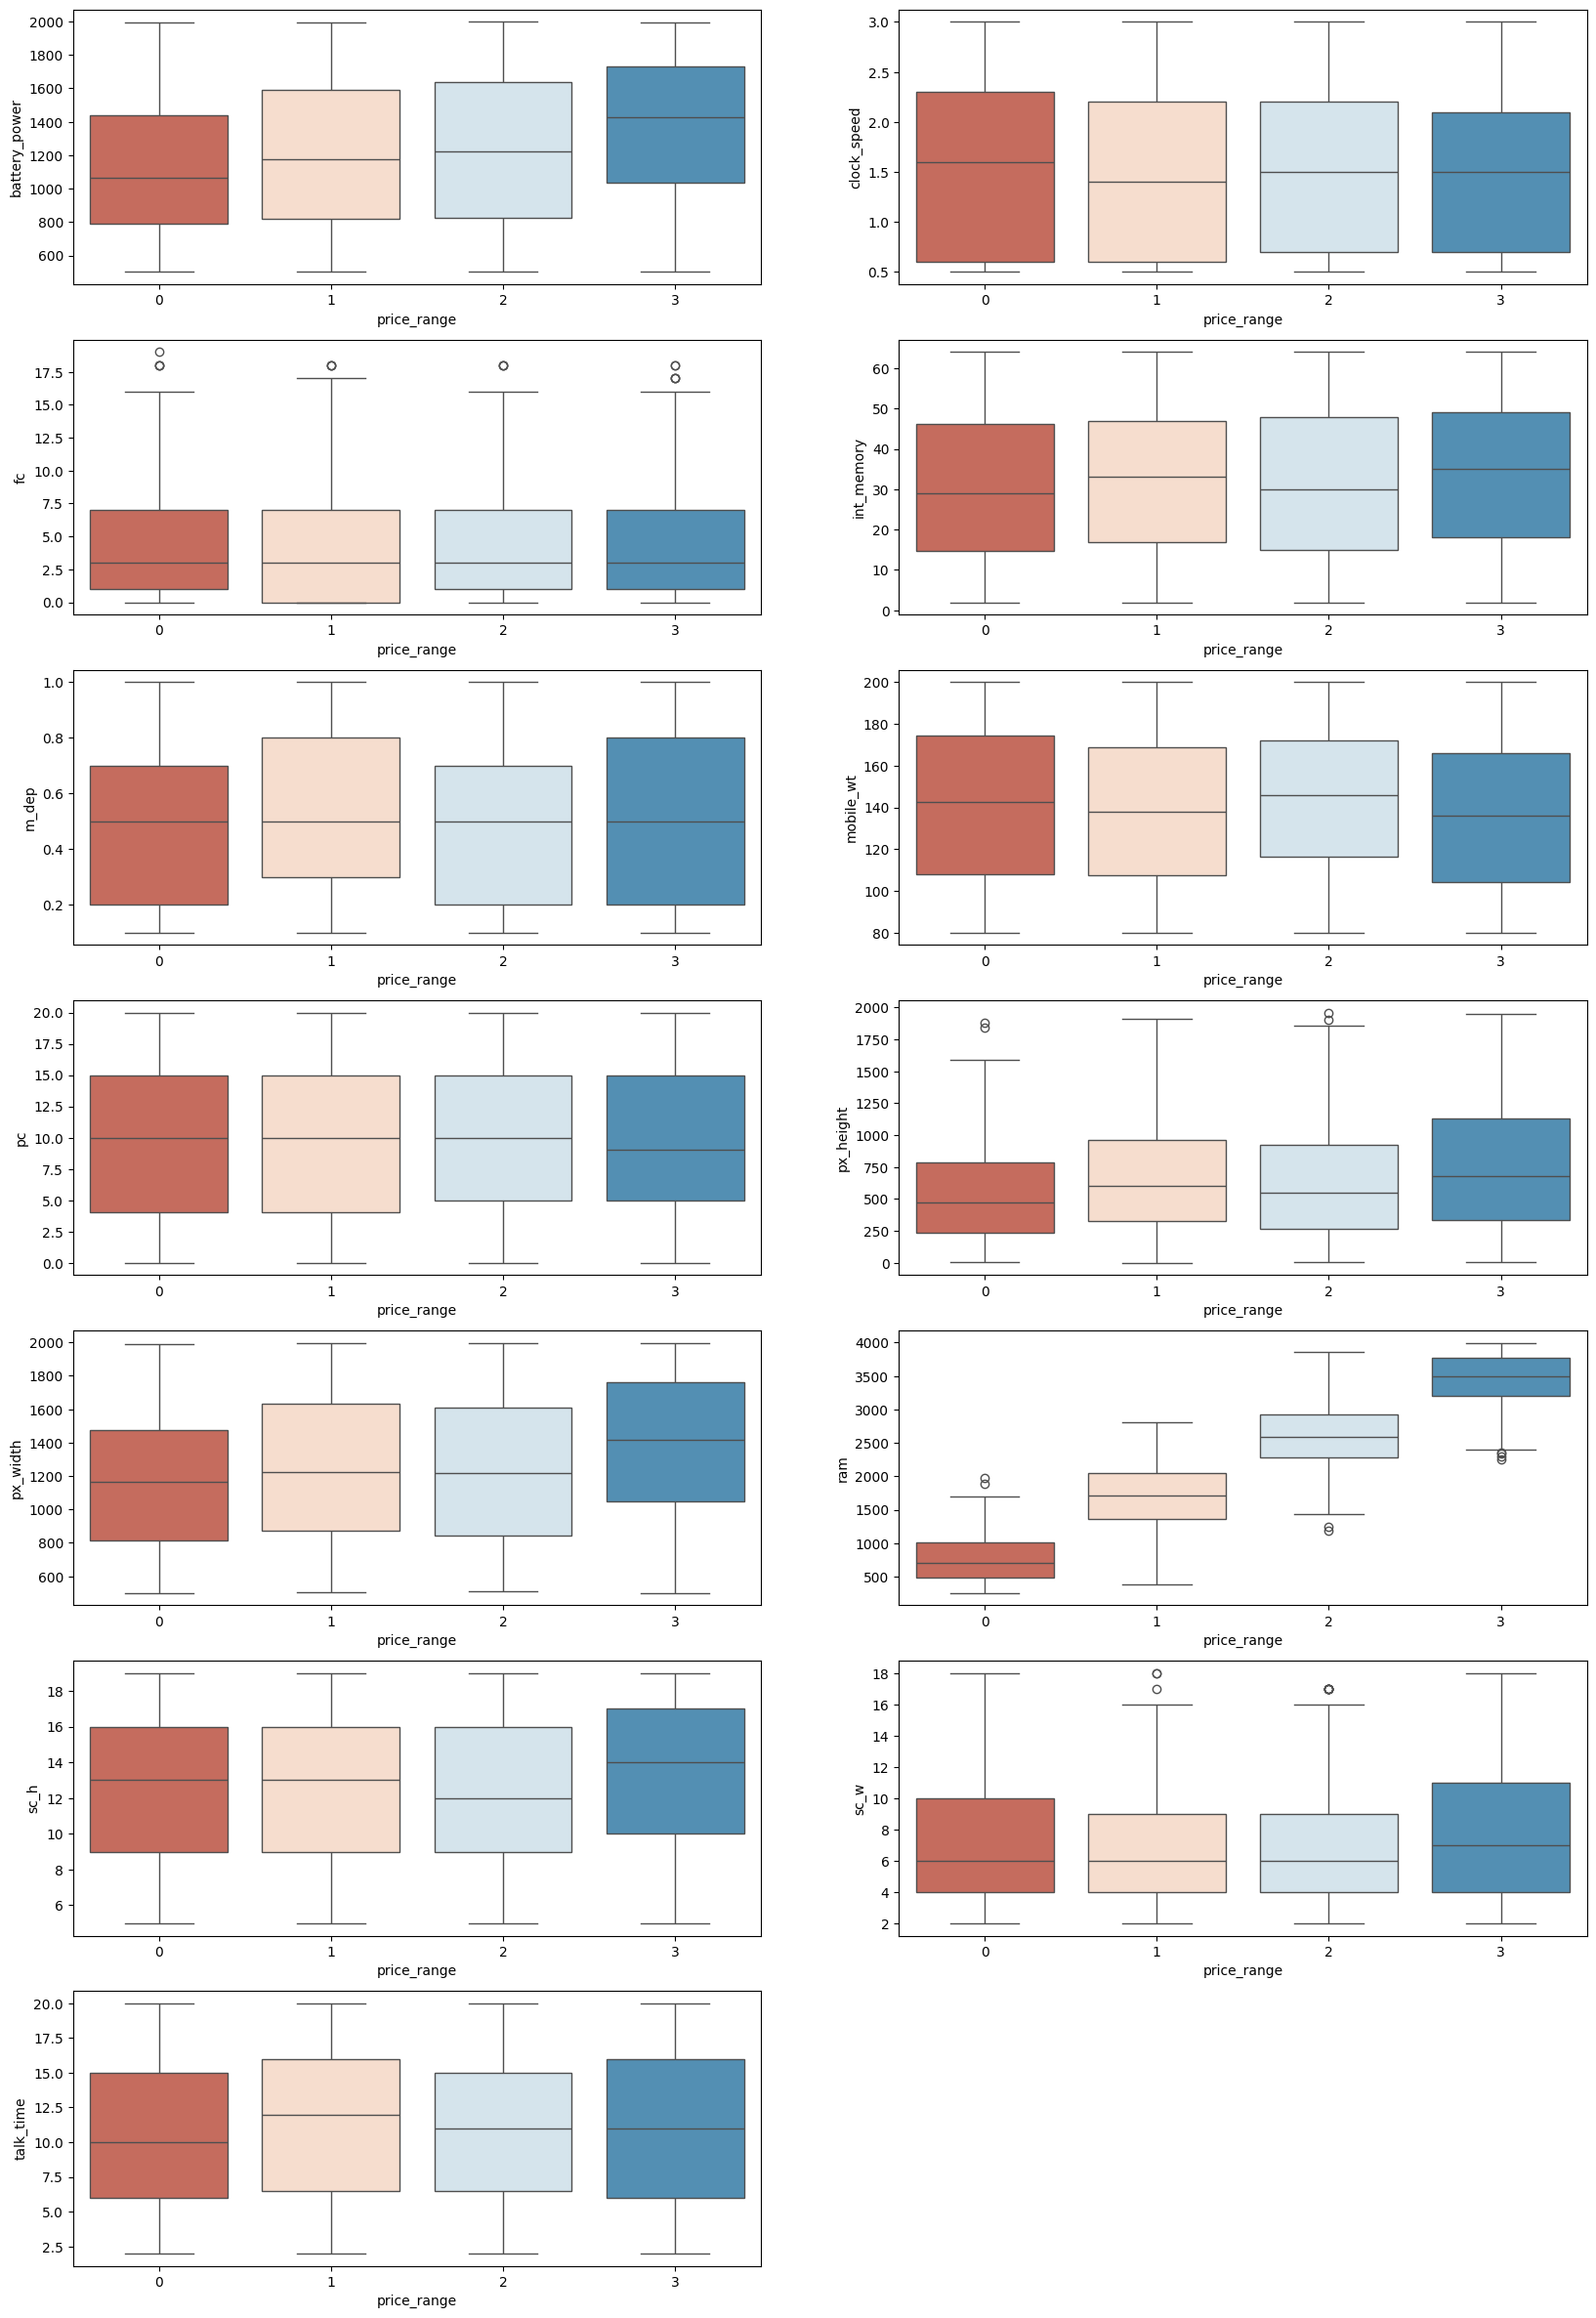

In [30]:
fig=plt.figure(figsize=(20,30))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(y=train[col],x=train['price_range'], palette = "RdBu")


Observations:

* Mobiles categorized as "very expensive" tend to feature higher memory capacities and battery power.
* There is an inverse relationship between thickness and price, where thicker mobiles tend to be priced lower, while thinner ones are often more expensive.
* Lower-priced mobiles may have reduced weight due to fewer features and equipment, such as smaller batteries and fewer cameras, compared to their more expensive counterparts.
* The presence and quality of the primary camera serve as significant factors influencing mobile prices.
* The maximum talk time is typically found within the low to medium price range.

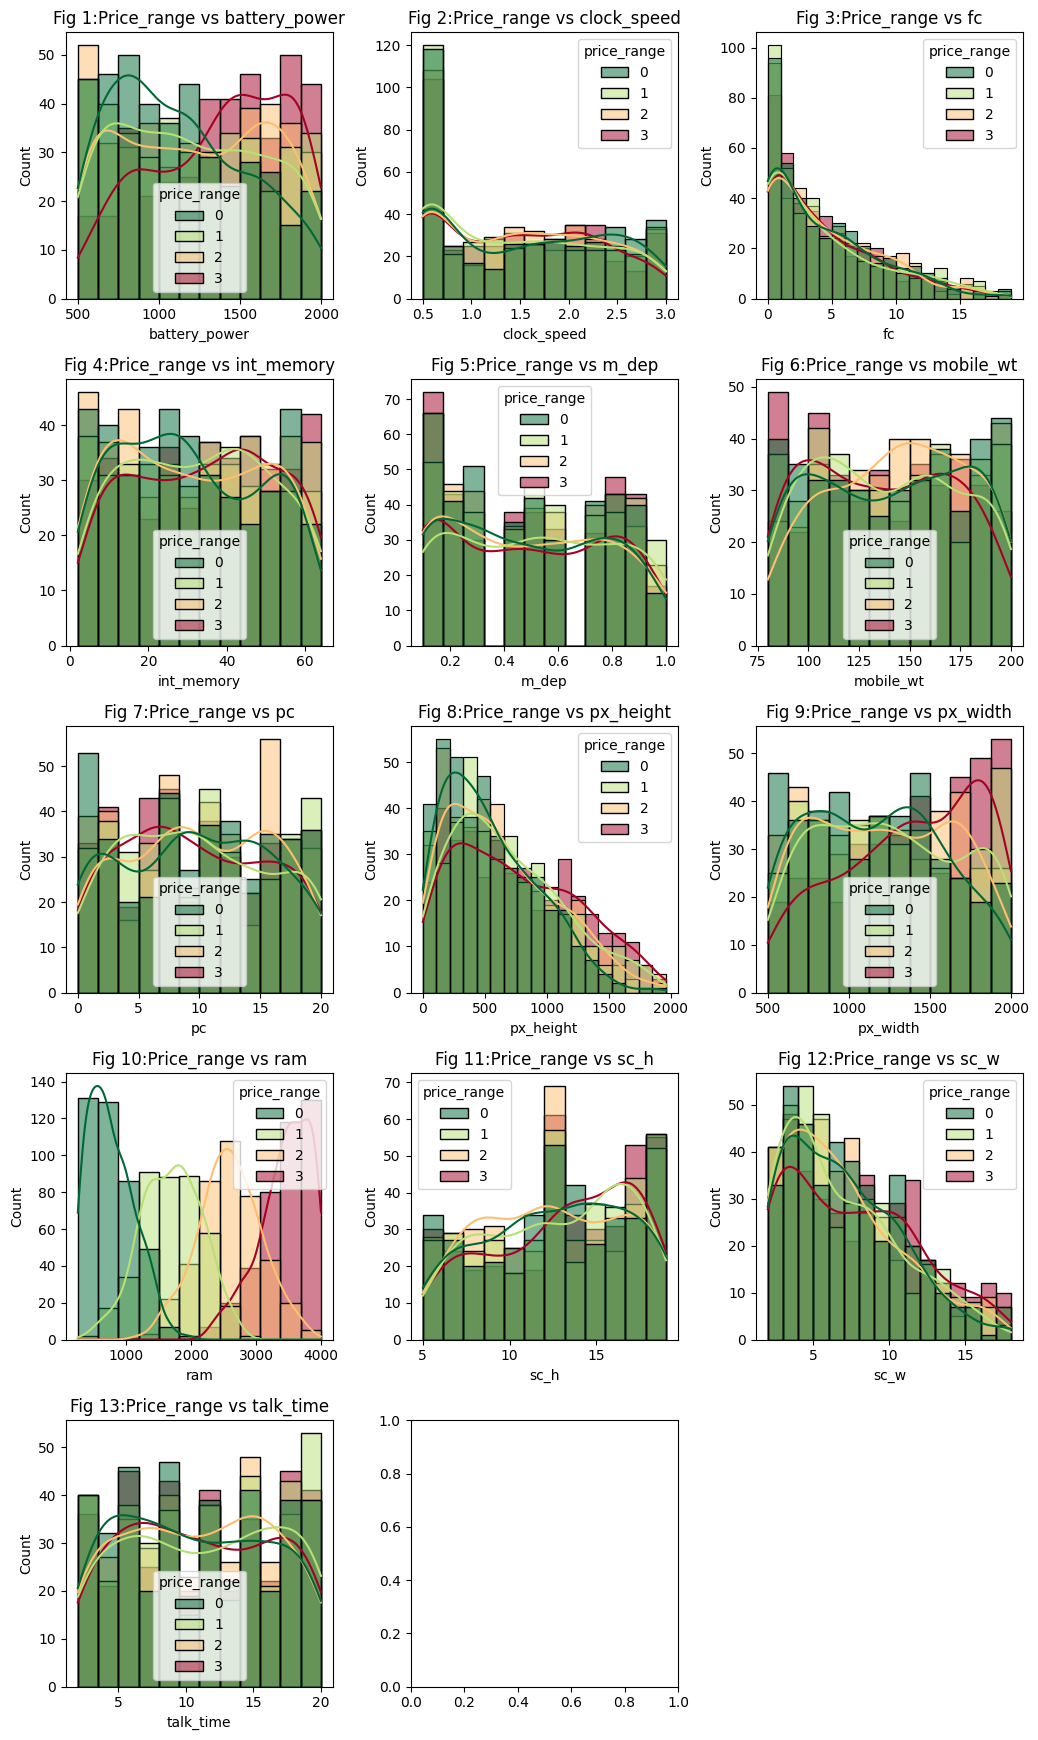

In [31]:
#vis for numerical type
n_rows=5
n_cols=3
fig,ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):
    for c in range(0,n_cols):
        idx = r*n_cols + c #index loop through list
        if idx <len(continuous_variables):
            ax_idx = ax[r,c]
            sns.histplot(data=train, x=continuous_variables[idx],hue ='price_range',kde='true'
                         ,palette='RdYlGn_r',ax=ax_idx)
            ax_idx.set_title(f"Fig {idx+1}:Price_range vs {continuous_variables[idx]}")
ax.flat[-1].set_visible(False) # remove subplot doesn't use
plt.tight_layout()
plt.show()


Observations:

* Mobile phones in the lowest price range 0 are predominantly found with lower battery power, while those in the highest price range 3 are prevalent with higher battery power.
* Battery power distribution is relatively uniform among mobiles in price ranges 1 and 2.
* There is a positive correlation between RAM size and mobile price.
* The majority of clock speed values fall within the range of 0.5 to 0.6.
* As pixel height increases, the quantity of mobile phones decreases.

## **Building the model**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Splitting data into features (X) and target variable (y)
X = train.drop('price_range', axis=1)
y = train['price_range']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier (you can use any other suitable model)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8753894080996885
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        79
           1       0.82      0.80      0.81        82
           2       0.90      0.84      0.87        91
           3       0.90      0.96      0.93        69

    accuracy                           0.88       321
   macro avg       0.88      0.88      0.88       321
weighted avg       0.88      0.88      0.87       321



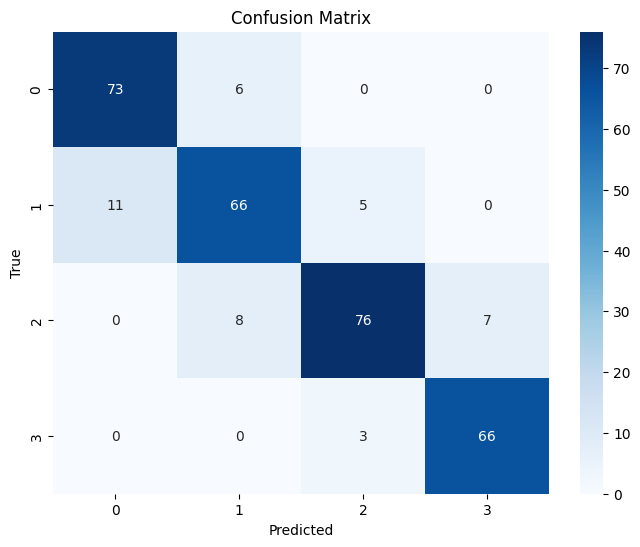

In [33]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The model got 281 Correctly while 40 incorretly
The false positives are maximum at class 1, althoug the error is acceptable, while class 3 is more easier to classify.

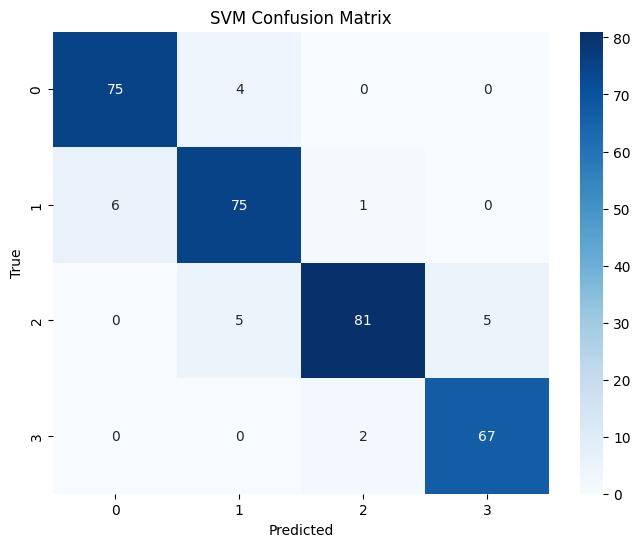

In [34]:
# Initialize SVM Classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions using SVM model
svm_y_pred = svm_model.predict(X_test)

# Get the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()


The true positives increased in this model

In [35]:
from joblib import dump

# Save the trained SVM model
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [37]:
import json

with open('column_names.json', 'w') as f:
    json.dump(list(X.columns), f)

In [38]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')